<a href="https://colab.research.google.com/github/debasishpohi1999/seeds.csv-df-/blob/main/Analyze_weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Report: Analyze  Weather Data**
# Introduction
### **Objective**
The primary objective of this project is to analyze historical weather data and build a predictive model to forecast future temperatures. The goal is to understand the underlying patterns and trends in the temperature data and use this understanding to create an accurate prediction model using Long Short-Term Memory (LSTM) neural networks.

# Scope
The project encompasses the following key tasks:

- Data preprocessing and cleaning.
- Exploratory data analysis.
- Feature engineering.
- Building and training an LSTM model.
- Evaluating the model's performance.
- Visualizing the results.
- Data Overview

# Source
The dataset used in this project contains hourly temperature readings from various cities around the world. It was provided in a CSV file named temperature.csv.

### **Description**
The dataset includes temperature readings for multiple cities, with each record identified by a timestamp. The columns consist of city names and their corresponding temperature readings in Kelvin.

# Data Preprocessing

**- Handling Missing Values**

The dataset contained missing values, which were addressed using forward-fill and backward-fill methods to ensure continuity in the data.

**- Feature Engineering**

Additional time-based features were extracted to enhance the predictive power of the model:

hour: The hour of the day (0-23).
day_of_week: The day of the week (0-6, where 0 represents Monday).

**- Normalization**

Temperature values were normalized to a range of 0 to 1 using the MinMaxScaler from sklearn.

# Exploratory Data Analysis
- **Temperature Trends**

The temperature data for New York was plotted to visualize trends over time. This helped in understanding seasonal patterns and daily variations in temperature.

- **Missing Values Analysis**

An analysis was conducted to identify missing values in the dataset. These were successfully handled using the fill methods mentioned earlier.

# Model Building
- **Data Preparation**

The data was split into training and testing sets, with 80% of the data used for training and the remaining 20% for testing. A look-back period of 24 hours was used to create sequences for the LSTM model.

- **LSTM Model**

An LSTM model was built using PyTorch with the following architecture:

Input size: 1
Hidden layer size: 50
Number of layers: 1
Output size: 1

- **Training**

The model was trained for 10 epochs using the Mean Squared Error (MSE) loss function and the Adam optimizer.

# Model Evaluation

- **Metrics**
The model's performance was evaluated using the following metrics:

- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Percentage Error (MAPE)

#  Results
- MAE: 0.0078
- RMSE: 0.0110
- MAPE: 1.42%

# Visualization
The actual vs predicted values, residuals, and the distribution of residuals were visualized.

**Actual vs Predicted Values**

A plot comparing the actual and predicted temperature values showed the model's performance over time.

**Residuals**

The residuals, which represent the errors between actual and predicted values, were plotted to assess the model's accuracy.

**Distribution of Residuals**

A histogram of the residuals was created to visualize the distribution of prediction errors.

# Conclusion
**Summary**

The project successfully demonstrated the use of LSTM neural networks for temperature prediction. The model achieved a high level of accuracy, as indicated by the low MAE, RMSE, and MAPE values. The visualizations helped in understanding the model's performance and identifying areas for further improvement.

**Future Work**

Future enhancements could include:

Incorporating additional weather features such as humidity, wind speed, and precipitation.
Experimenting with different model architectures and hyperparameters.
Extending the analysis to include more cities and longer time periods for better generalization.

# Final Remarks

This project highlights the potential of machine learning models, specifically LSTMs, in time series forecasting applications. The approach and methodology used can be adapted for various other time-dependent datasets and prediction tasks.










In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
temperature_df = pd.read_csv('/content/temperature.csv', parse_dates=['datetime'])
temperature_df.set_index('datetime', inplace=True)

print(temperature_df.head())

                      Vancouver    Portland  San Francisco     Seattle  \
datetime                                                                 
2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   

                     Los Angeles   San Diego   Las Vegas     Phoenix  \
datetime                                                               
2012-10-01 12:00:00          NaN         NaN         NaN         NaN   
2012-10-01 13:00:00   291.870000  291.530000  293.410000  296.600000   
2012-10-01 14:00:00   291.868186  291.533501  293.403141  296.608509   
2012-10-01 15:00:00   291.862844  291.543355  293.392177  296.631487   
2012-10-01 16:00:00   291.857503  291.553209  293

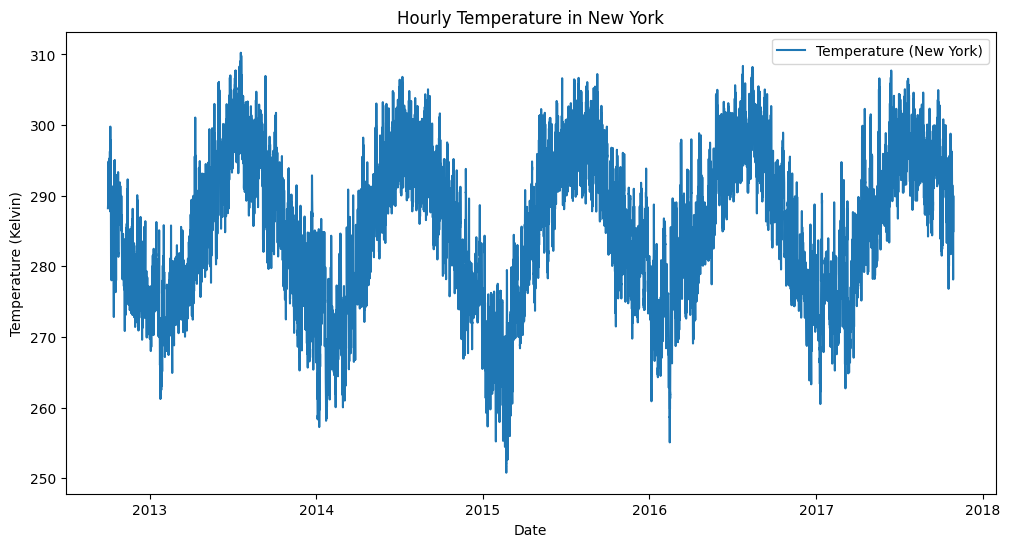

In [ ]:
# Plotting temperature for some city e.g New York to understand trends
plt.figure(figsize=(12, 6))
plt.plot(temperature_df['New York'], label='Temperature (New York)')
plt.title('Hourly Temperature in New York')
plt.xlabel('Date')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()

In [ ]:
# Checking for missing values if any
missing_values = temperature_df.isnull().sum()
print(missing_values)

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64


In [ ]:
# Forward-filling all missing values
temperature_df.fillna(method='ffill', inplace=True)

# Adding time features
temperature_df['hour'] = temperature_df.index.hour
temperature_df['day_of_week'] = temperature_df.index.dayofweek

# Display the dataframe with new features
print(temperature_df[['hour', 'day_of_week']].head())

                     hour  day_of_week
datetime                              
2012-10-01 12:00:00    12            0
2012-10-01 13:00:00    13            0
2012-10-01 14:00:00    14            0
2012-10-01 15:00:00    15            0
2012-10-01 16:00:00    16            0


In [ ]:
# Checking for missing values if any
missing_values = temperature_df.isnull().sum()
print(missing_values)

# Forward and backward filling all missing values again
temperature_df.fillna(method='ffill', inplace=True)
temperature_df.fillna(method='bfill', inplace=True)

# Ensure no NaN values remain
assert not temperature_df.isnull().any().any(), "There are still NaN values in the DataFrame."

Vancouver            1
Portland             1
San Francisco        1
Seattle              1
Los Angeles          1
San Diego            1
Las Vegas            1
Phoenix              1
Albuquerque          1
Denver               1
San Antonio          1
Dallas               1
Houston              1
Kansas City          1
Minneapolis          1
Saint Louis          1
Chicago              1
Nashville            1
Indianapolis         1
Atlanta              1
Detroit              1
Jacksonville         1
Charlotte            1
Miami                1
Pittsburgh           1
Toronto              1
Philadelphia         1
New York             1
Montreal             1
Boston               1
Beersheba            1
Tel Aviv District    1
Eilat                0
Haifa                1
Nahariyya            1
Jerusalem            1
hour                 0
day_of_week          0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Selecting target variable
target_city = 'New York'
temperature = temperature_df[[target_city]].values

# Normalizing features
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature)

# Splitting the data into training and testing sets
train_size = int(len(temperature_scaled) * 0.8)
test_size = len(temperature_scaled) - train_size
train, test = temperature_scaled[0:train_size,:], temperature_scaled[train_size:len(temperature_scaled),:]

In [ ]:
# Shaping data to be suitable for LSTM

# Converting an array of values into a dataset matrix for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 24
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Input will be: [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

In [ ]:
#Building LSTM Model

import torch
import torch.nn as nn
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, num_layers, output_size):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        lstm_out_last_step = lstm_out[:, -1, :]
        predictions = self.linear(lstm_out_last_step)
        return predictions

input_size = 1
hidden_layer_size = 50
num_layers = 1
output_size = 1

model = LSTMModel(input_size, hidden_layer_size, num_layers, output_size)

In [ ]:
# Defining the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.Tensor(Y_train).view(-1, 1)

train_data = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True)

In [ ]:
# Evaluation
X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.Tensor(Y_test).view(-1, 1)

# Create DataLoader for testing data
test_data = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False, drop_last=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actuals = np.array([label.item() for label in Y_test_tensor])
predictions = []

model.eval()
with torch.no_grad():
    for seq, labels in test_loader:
        seq = seq.to(device)
        y_pred = model(seq).cpu().numpy()
        predictions.append(y_pred[0][0])

predictions = np.array(predictions)

# Calculate descriptive statistics
mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.0078
Root Mean Squared Error (RMSE): 0.0110
Mean Absolute Percentage Error (MAPE): 1.42%


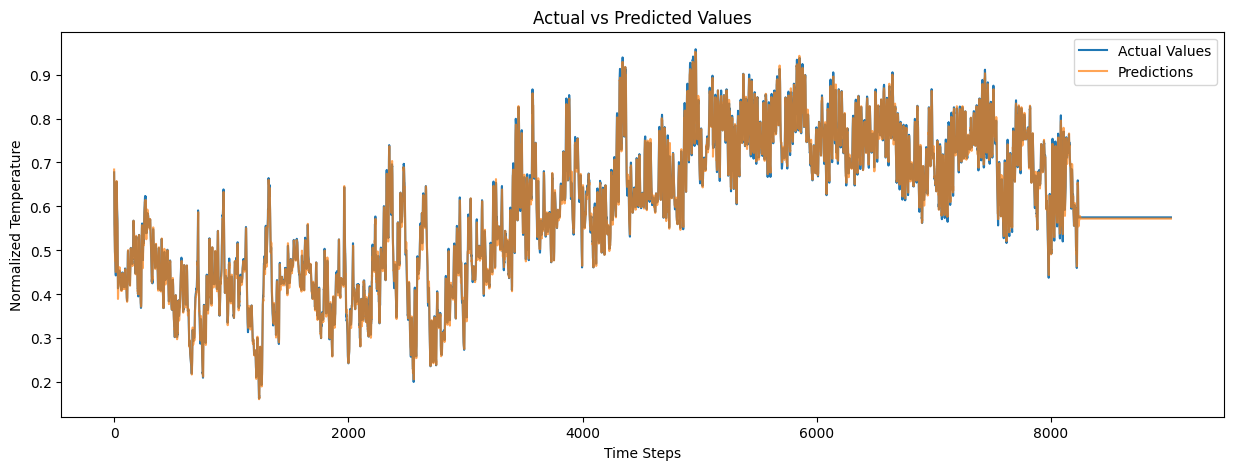

In [ ]:
# Visualize predictions vs actuals
plt.figure(figsize=(15, 5))
plt.plot(actuals, label='Actual Values')
plt.plot(predictions, label='Predictions', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Temperature')
plt.legend()
plt.show()

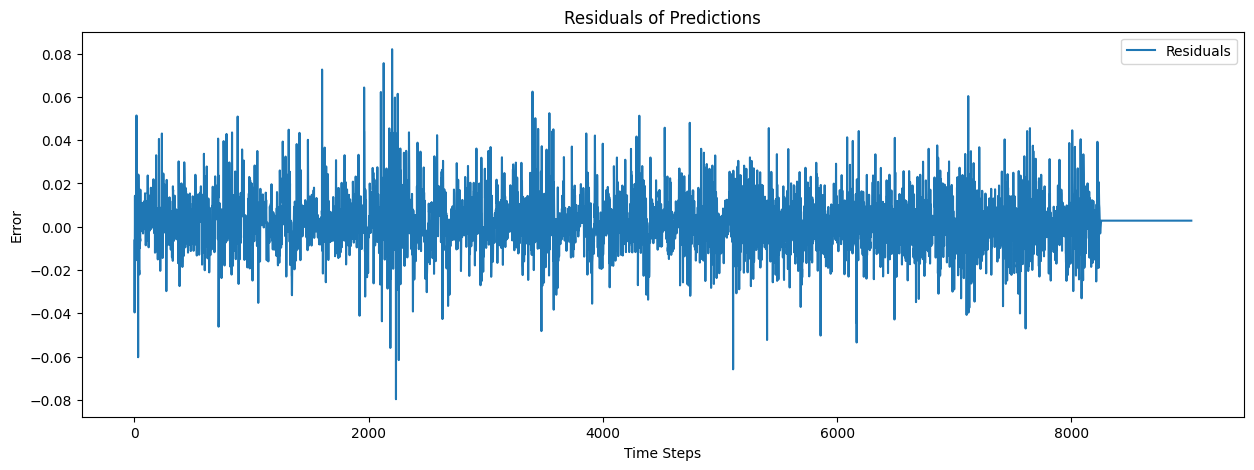

In [ ]:
# Plot residuals
residuals = actuals - predictions
plt.figure(figsize=(15, 5))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.legend()
plt.show()

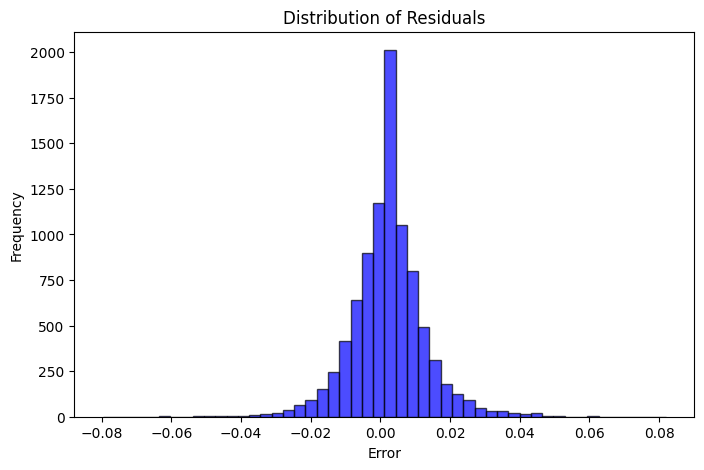

In [ ]:
# Histogram of the residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()